## Analysis of decoder performance for the four generated linear decoders

This notebook analyses each of the generated linear decoder's performance in the closed loop in four groups:
 - A : all rigid bodies bar the right hand (control rigid body)
 - B : all rigid bodies bar the right side 
 - C : Left Hand only
 - D : Right Hand Only (control)

In [1]:
# First import the necessary libraries
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0,'/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces')
from Experiment_pointer.DataAnalysis.postProcessRawData import processTrialData, readIndividualTargetMovements,plotVar,calcNormalisedAcquisitionTimes


We first start with group A

Plot the cursor position paths

First let's plot the trajectories


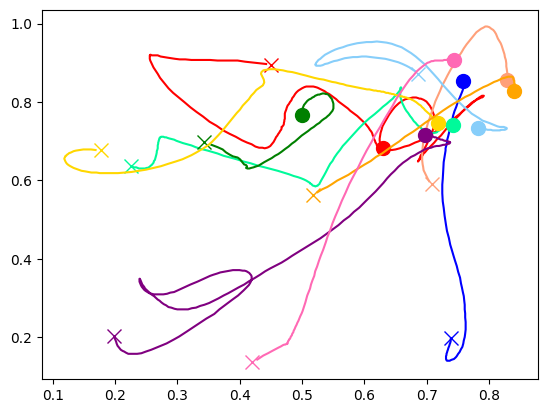

Now let's plot the evolution of normalised aquisition time


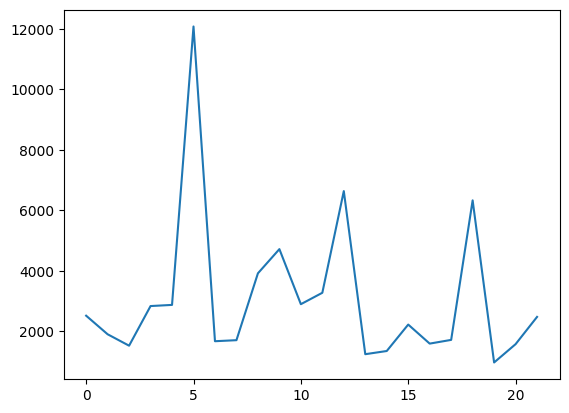

In [8]:
# Group A
gameSavePath = "23_11_ashTrial1_120s_test_usingModelDecoderA.npz"
returnDict = processTrialData(gameSavePath,None,DOFOffset=0.03,returnAsDict=True,ignoreCalibration= True)
individualMovements = readIndividualTargetMovements(returnDict)

print("First let's plot the trajectories")
cursorPosData = individualMovements['cursorPosData'][5:15] #  trajectories
plotVar(cursorPosData,list_ = True)
plt.show()


print("Now let's plot the evolution of normalised aquisition time")
acquireTimesA = calcNormalisedAcquisitionTimes(individualMovements)

Now move to group B

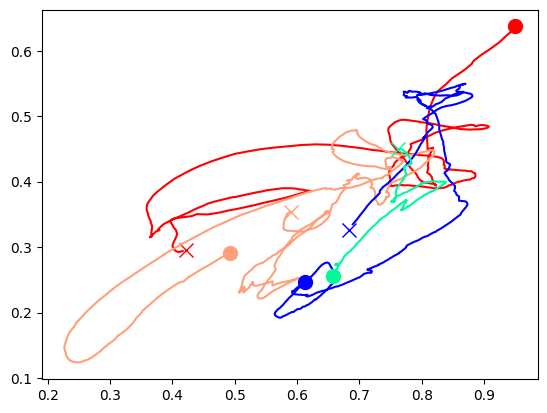

Now let's plot the evolution of normalised aquisition time


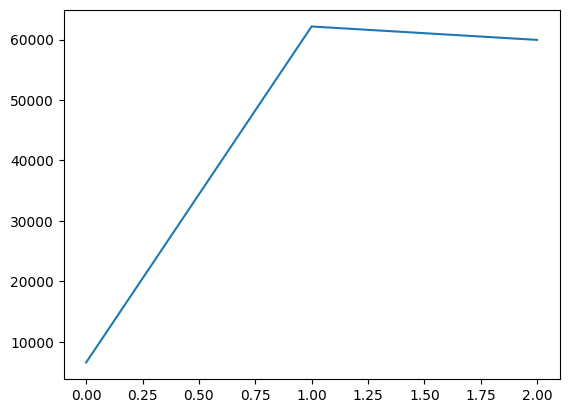

In [9]:
# Group B
gameSavePath = "23_11_ashTrial1_120s_test_usingModelDecoderB.npz"
returnDict = processTrialData(gameSavePath,None,DOFOffset=0.03,returnAsDict=True,ignoreCalibration= True)
individualMovements = readIndividualTargetMovements(returnDict)
cursorPosData = individualMovements['cursorPosData'][0:5]

plotVar(cursorPosData,list_ = True)
print("Now let's plot the evolution of normalised aquisition time")
acquireTimesB  = calcNormalisedAcquisitionTimes(individualMovements)

Now we move to group C

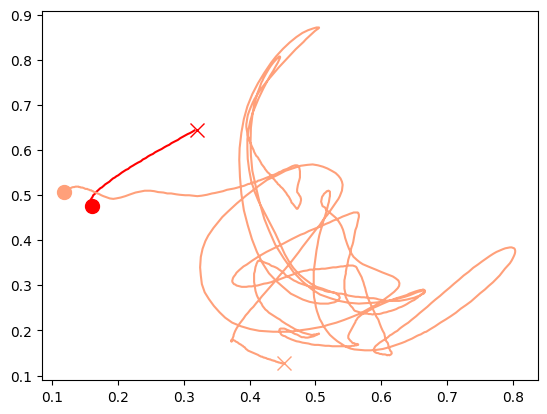

Now let's plot the evolution of normalised aquisition time


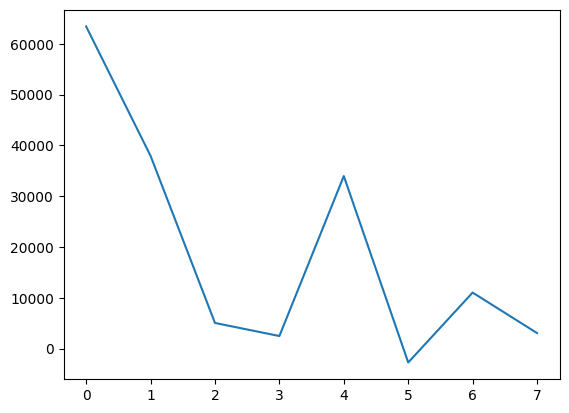

In [11]:
# Group C
gameSavePath = "23_11_ashTrial1_120s_test_usingModelDecoderC.npz"
returnDict = processTrialData(gameSavePath,None,DOFOffset=0.03,returnAsDict=True,ignoreCalibration= True)
individualMovements = readIndividualTargetMovements(returnDict)
cursorPosData = individualMovements['cursorPosData'][7:]

plotVar(cursorPosData,list_ = True)
print("Now let's plot the evolution of normalised aquisition time")
acquireTimesC = calcNormalisedAcquisitionTimes(individualMovements)

And finally group D, the control

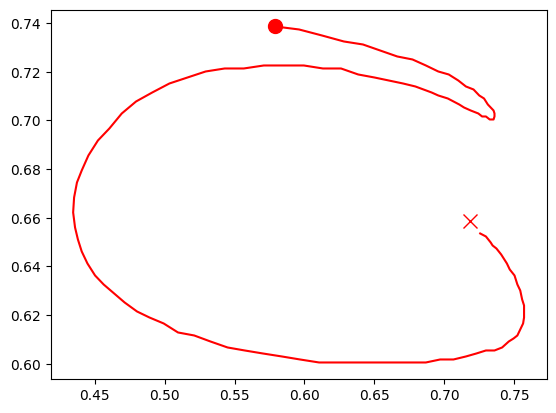

Now let's plot the evolution of normalised aquisition time


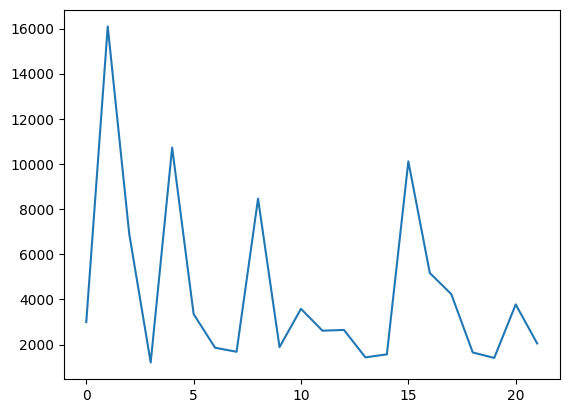

In [5]:
# Group D
gameSavePath = "23_11_ashTrial1_120s_test_usingModelDecoderD.npz"
returnDict = processTrialData(gameSavePath,None,DOFOffset=0.03,returnAsDict=True,ignoreCalibration= True)
individualMovements = readIndividualTargetMovements(returnDict)
cursorPosData = individualMovements['cursorPosData'][2:3]

plotVar(cursorPosData,list_ = True)
print("Now let's plot the evolution of normalised aquisition time")
acquireTimesD = calcNormalisedAcquisitionTimes(individualMovements)

Now let's overlay all aquisition time plots

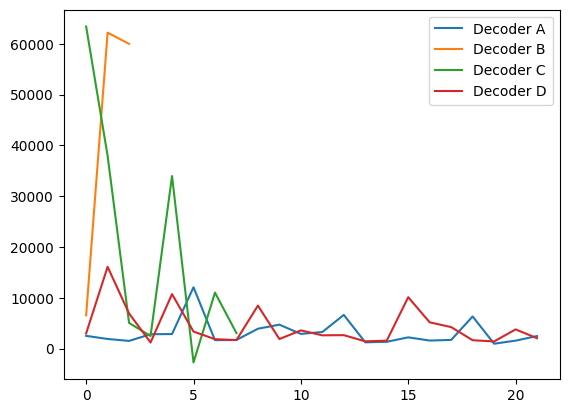

In [7]:
plt.plot(acquireTimesA, label = "Decoder A")
plt.plot(acquireTimesB, label = "Decoder B")
plt.plot(acquireTimesC, label = "Decoder C")
plt.plot(acquireTimesD, label = "Decoder D")
plt.ylabel("Normalised acquisition time ")
plt.legend()
plt.show()